In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_excel(r"C:\Users\Vinayak Goyal\Downloads\flight_price.xlsx")

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Q1

In [12]:
df.shape

(10683, 11)

##### 10683 rows and 11 columns

### Q2

<AxesSubplot:xlabel='Price', ylabel='Count'>

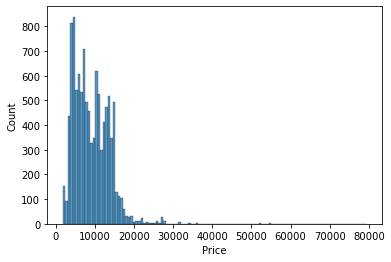

In [53]:
sns.histplot(data=df,x='Price')

### Q3.

In [16]:
df['Price'].describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

##### Price Range - 1759 to 79512
##### Max Price = 79512
##### Min Price = 1759

### Q4

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

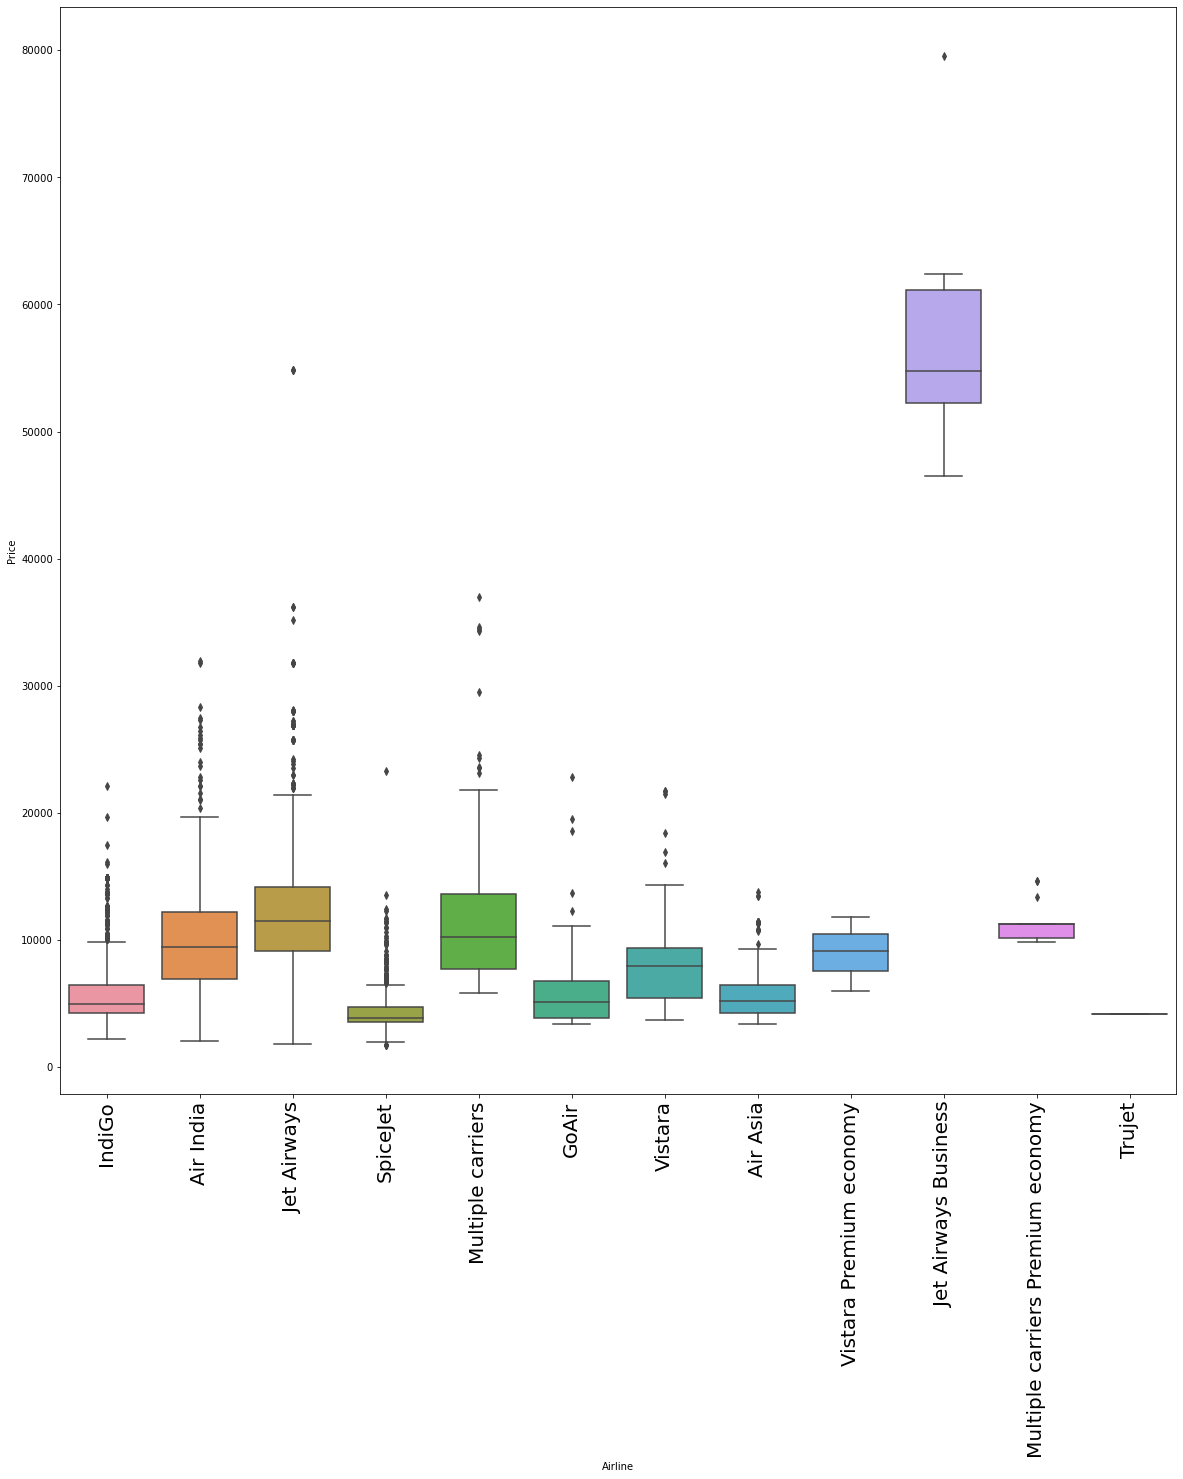

In [27]:
plt.figure(figsize = (20,20))
sns.boxplot(data=df,x="Airline",y="Price")
plt.xticks(size=20,rotation=90)

### Q5

##### With the help of above box plot we can say that dataset has contains outliers. Which will effect my model during training as model will try to fit those outlier as well and can get deviated and will not give good result for correct dataset.

### Q6

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [31]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [36]:
df["Journey_day"] = df['Date_of_Journey'].dt.day
df["Journey_month"] = df['Date_of_Journey'].dt.month
df["Journey_year"] = df['Date_of_Journey'].dt.year

<AxesSubplot:xlabel='Journey_month', ylabel='count'>

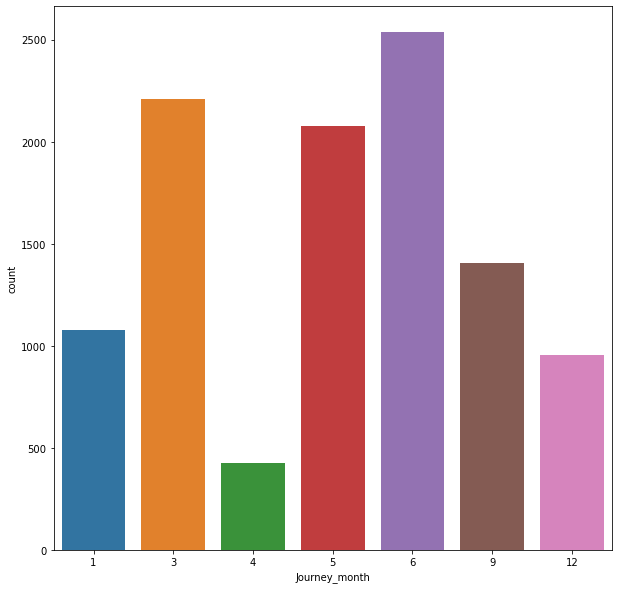

In [51]:
plt.figure(figsize=(10,10))
sns.countplot(data = df,x="Journey_month")

###### Most people travel in the month of "June"

### Q7

In [102]:
df["Duration_hour"]=df["Duration"].str.split(" ").str[0].str.split("h").str[0]

In [105]:
df["Duration_hour"]=df["Duration_hour"].astype(int)

In [106]:
df["Duration_minute"]=df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [115]:
df["Duration_minute"]==np.nan

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Duration_minute, Length: 10682, dtype: bool

In [116]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Duraction_hour,Duraction_minute,Duration_hour,Duration_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,2,50,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,2019,7,25,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,2019,19,NaN,19,NaN
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,2019,5,25,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,2019,4,45,4,45


In [49]:
data=pd.DataFrame(df.groupby(["Airline","Journey_month"])["Price"].mean())

In [57]:
data

Price
Airline                 Journey_month              
Air Asia                1               6416.392857
                        3               5929.711864
                        4               4951.250000
                        5               5296.000000
                        6               5346.202899
...                                             ...
Vistara                 9               7716.393443
                        12              7809.326923
Vistara Premium economy 1               9125.000000
                        3              11793.000000
                        6               5969.000000

[64 rows x 1 columns]

### Q8

In [ ]:
From the above line chart we can say that factor that determine flight size 